In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import tqdm

In [ ]:
# X is the two dimension matrix which represents the axis of the data set graph.
# y is the matrix which contains the type of each data.

X, y = make_blobs(n_samples=100, n_features=2, centers=2, random_state=0)
y = y.reshape((y.shape[0], 1))

print("X dimensions :", X.shape)
print("y dimensions :", y.shape)

plt.scatter(X[:,0], X[:, 1], c=y, cmap="summer")
plt.show()

- Agregation Function : $$z : (x_1, x_2) \longmapsto w_1x_1 + w_2x_2 + b$$

In [ ]:
def agregation_function(w1: float, w2: float, b: float, np_abcisse, np_ordinate) -> tuple:
    """
    `w1 : First synapse strength.`
    `w2 : Second synapse strentgh.`
    `b : Bias.`
    `np_abcisse : Numpy array of all abcisse of the dataset of points.`
    `np_ordinate : Numpy array of all ordinates of the dataset of points.`

    Return a tuple of ordinates preview and type of point.
    """
    affine_ordinate = (-w1 * np_abcisse - b)/w2
    result = w1 * np_abcisse + w2 * np_ordinate + b

    return (affine_ordinate, result >= 0, result)

In [ ]:
def sigmoid(z: float) -> float:
    """
    `z : Image of the agregation function.`

    Return the image of z by the sigmoid mathematical function.
    """
    sigmoid_image: float = 1/(1 + np.exp(-z))

    return sigmoid_image

- Log loss : $$\frac{-1}{m}\sum_{i=1}^m y_i\log(a_i) + (1-y_i)\log(1-a_i)$$


In [ ]:
def log_loss_function(y_data, agregation_value) -> float:
    """
    `y_data : Numpy array which contains all the data natures of the data in the original dataset (X).`
    `agregation_dataset : Tuple of ordinates preview and type of point.`

    Return the log-loss value of our dataset.
    """
    log_loss_image = 0

    for i in range(np.size(y_data)):
        log_loss_image += y_data[i] * np.log(sigmoid(agregation_value[i])) + (1-y_data[i]) * np.log(1-sigmoid(agregation_value[i]))
    log_loss_image = -1/(np.size(y_data)) * log_loss_image

    return log_loss_image[0]

# **Gradient w1**

- Formula : $$\frac{1}{m}\sum_{i=1}^m (a_i - y_i)x_1$$

# **Gradient w2**

- Formula : $$\frac{1}{m}\sum_{i=1}^m (a_i - y_i)x_2$$ 

# **Gradient b**

- Formula :  $$\frac{1}{m}\sum_{i=1}^m (a_i - y_i)$$

In [ ]:
def w_optimal(w, learning_rate, y_data, agregation_value, X, column):
    gradient_w = 0

    for i in range(np.size(y_data)):
        gradient_w += (sigmoid(agregation_value[i]) - y_data[i]) * X[i][column]
    gradient_w = (1/np.size(y_data)) * gradient_w

    new_w = w - learning_rate * gradient_w

    return new_w


def bias_optimal(b, learning_rate, y_data, agregation_value):
    gradient_b = 0

    for i in range(np.size(y_data)):
        gradient_b += (sigmoid(agregation_value[i]) - y_data[i])
    gradient_b = (1/np.size(y_data)) * gradient_b

    new_b = b - learning_rate * gradient_b

    return new_b

100%|██████████| 200000/200000 [08:47<00:00, 379.12it/s]

[0.58378991] [-4.15001703] [10.34546037]


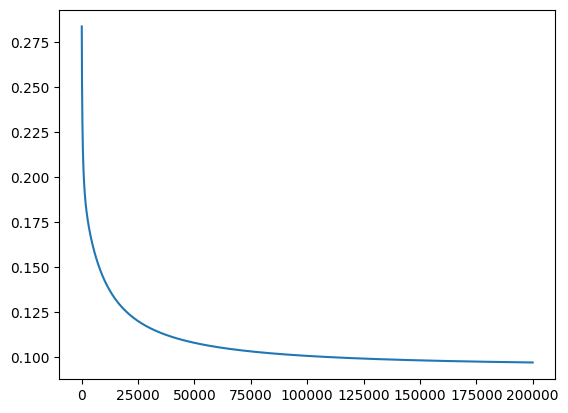

In [57]:
training_loop = 200000
learning_rate = 0.01
w1 = 0.58378991
w2 = -4.15001703 
b = 10.34546037
Loss = []

for i in tqdm.tqdm(range(training_loop)):
    
    prediction = agregation_function(w1, w2, b, X[:,0], X[:,1])[2]
    Loss.append(log_loss_function(y, prediction))
    
    w1 = w_optimal(w1, learning_rate, y, prediction, X, 0)
    w2 = w_optimal(w2, learning_rate, y, prediction, X, 1)
    b = bias_optimal(b, learning_rate, y, prediction)

plt.plot(Loss)

In [58]:
def predict(x1: float, x2: float) -> bool:
    type = agregation_function(w1, w2, b, x1, x2)[1]
    return type

This is an example of a possible prediction that can be done by our neurone (enter the point coordinates in the parameters of the `predict` function).

In [59]:
predict(2, 3)

array([False])

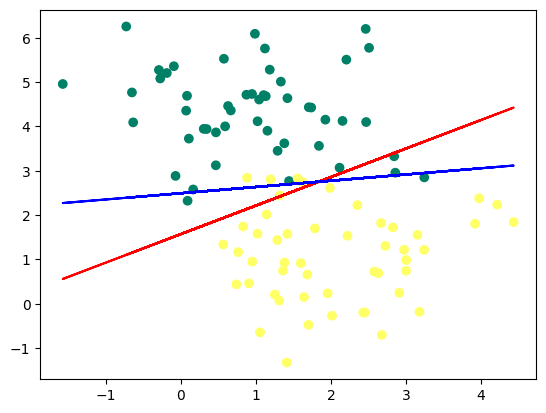

In [62]:
plt.scatter(X[:,0], X[:, 1], c=y, cmap='summer')
plt.plot(X[:,0], agregation_function(0.45, -0.70, 1.10, X[:,0], X[:,1])[0], c="red") # First parameters.
plt.plot(X[:,0], agregation_function(w1, w2, b, X[:,0], X[:,1])[0], c="blue") # Nearly optimal parameters.

plt.show()
